### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [7]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Exploratory Data Analysis (EDA)

In [18]:
# View structure and summary
df.info()
df.describe()
print(df.isnull().sum())  # Summarizes missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_ty

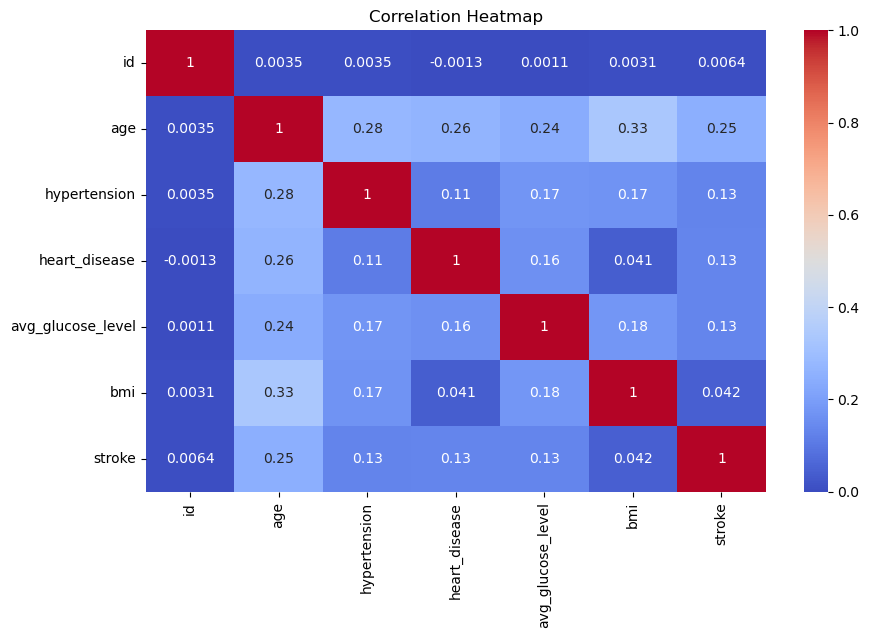

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 6))  # optional: to make the heatmap larger

# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

# Calculate and plot the correlation heatmap for numerical columns
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

###  Handle Missing Values

In [25]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_7696\1439978410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


### Encode Categorical Variables

In [28]:
df = pd.get_dummies(df, drop_first=True)

### Split Data

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Handle Imbalanced Data

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Train ML Model (XGBoost)

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.16      0.14      0.15        50

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.56      1022
weighted avg       0.92      0.92      0.92      1022



### Model Explainability 

In [46]:
# After training your model (e.g., model = XGBClassifier())
importances = model.feature_importances_
feature_names = X.columns  # your input feature names

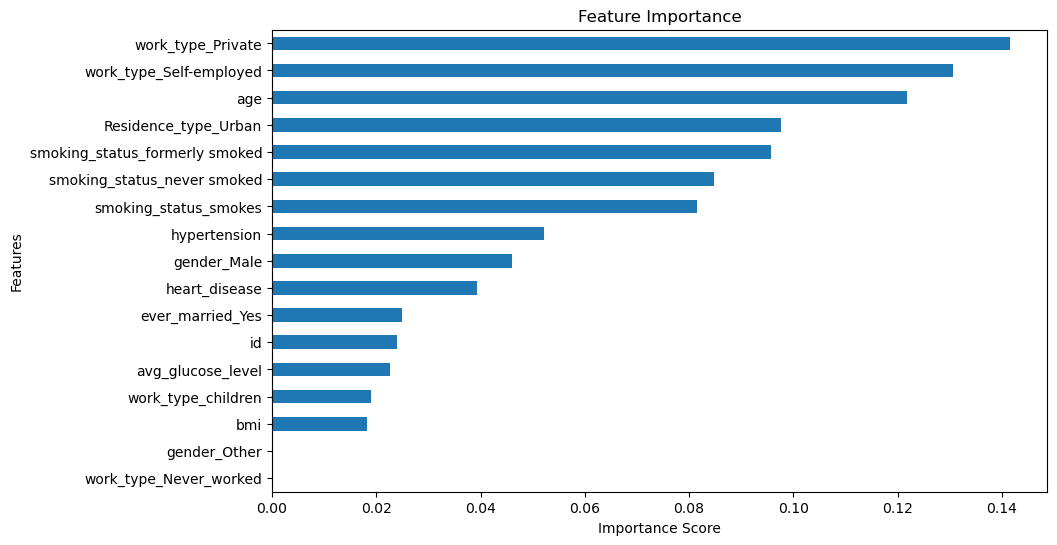

In [48]:
# Create a bar plot
feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Logistic Regression Coefficients (for linear models)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


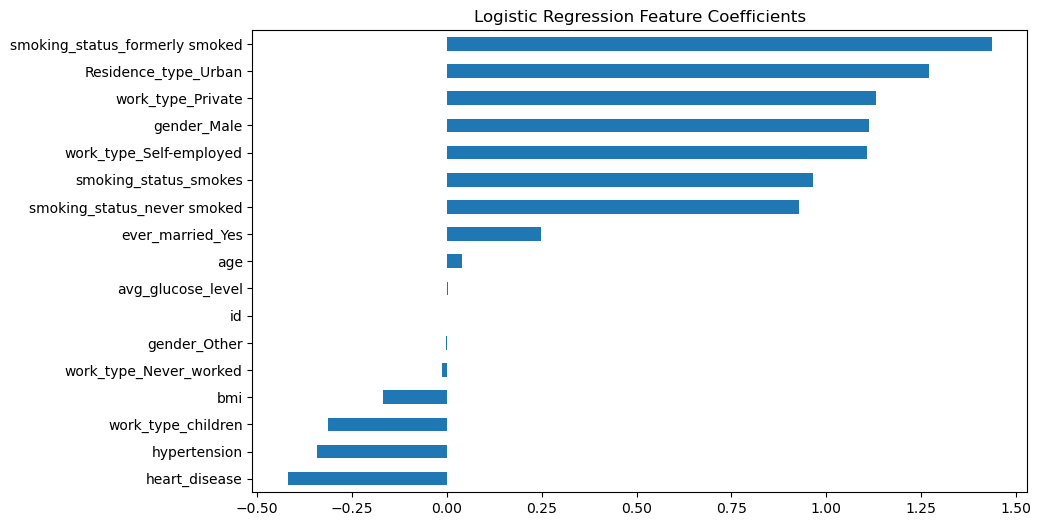

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Logistic Regression Feature Coefficients")
plt.show()

### Save the Trained Model

In [57]:
import joblib

# Save model
joblib.dump(model, 'stroke_model.pkl')
print("Model saved as stroke_model.pkl")

Model saved as stroke_model.pkl
